# Interpretation of animal actions

* cat, cow, dog, horse, sheep, cow - столбцы, которые определяет какое животное рассматривается в данной строк (в том столбце из 5, где стоит 1, то этот столбец отвечает за вид животного)
* bounds_x, bounds_y, bounds_width, bounds_height - параметры прямоугольника, в которое попадает животное (зеленый прямоугольник на изображении ниже).
* Все остальные столбцы отвечают за различные ключевые точки: два глаза, горло, нос, холка, два основания ушей, основание хвоста, четыре локтя, четыре колена, четыре лапы. Где постфикс _x - это координата точки по OX, _y - это координата точки по OY, _v - видимость ключевой точки на картинке (1 - видно, 0 - не видно)

In [617]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [618]:
X = pd.read_csv('x_train.csv')
Y = pd.read_csv('y_train.csv')

In [619]:
X.head(7)

,id,cat,cow,dog,horse,sheep,bounds_x,bounds_y,bounds_width,bounds_height,...,L_F_paw_y,R_F_paw_v,R_F_paw_x,R_F_paw_y,L_B_paw_v,L_B_paw_x,L_B_paw_y,R_B_paw_v,R_B_paw_x,R_B_paw_y
0,265,0,1,0,0,0,37,16,240,170,...,167,1,161,168,1,94,173,1,55,177
1,676,0,0,0,1,0,43,8,208,236,...,213,1,193,209,1,77,232,1,115,233
2,441,0,0,1,0,0,65,0,234,222,...,0,0,0,0,0,0,0,0,0,0
3,328,0,1,0,0,0,15,8,272,178,...,171,1,190,172,1,52,176,1,35,178
4,102,1,0,0,0,0,2,1,148,146,...,130,1,68,131,1,3,128,0,0,0
5,766,0,0,0,1,0,1,0,296,266,...,246,0,0,0,1,288,253,1,250,248
6,120,1,0,0,0,0,21,0,276,184,...,0,0,0,0,0,0,0,0,0,0


In [620]:
Y.head(7)

,id,nothing,stand,sit,lie,go,run
0,265,0,0,0,0,1,0
1,676,0,0,0,0,1,0
2,441,1,0,0,0,0,0
3,328,0,1,0,0,0,0
4,102,0,0,0,1,0,0
5,766,0,1,0,0,0,0
6,120,1,0,0,0,0,0


In [621]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 676 entries, 0 to 675
Data columns (total 70 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   id             676 non-null    int64
 1   cat            676 non-null    int64
 2   cow            676 non-null    int64
 3   dog            676 non-null    int64
 4   horse          676 non-null    int64
 5   sheep          676 non-null    int64
 6   bounds_x       676 non-null    int64
 7   bounds_y       676 non-null    int64
 8   bounds_width   676 non-null    int64
 9   bounds_height  676 non-null    int64
 10  L_eye_v        676 non-null    int64
 11  L_eye_x        676 non-null    int64
 12  L_eye_y        676 non-null    int64
 13  R_eye_v        676 non-null    int64
 14  R_eye_x        676 non-null    int64
 15  R_eye_y        676 non-null    int64
 16  L_ear_v        676 non-null    int64
 17  L_ear_x        676 non-null    int64
 18  L_ear_y        676 non-null    int64
 19  R_ear_v 

In [622]:
Y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 676 entries, 0 to 675
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   id       676 non-null    int64
 1   nothing  676 non-null    int64
 2   stand    676 non-null    int64
 3   sit      676 non-null    int64
 4   lie      676 non-null    int64
 5   go       676 non-null    int64
 6   run      676 non-null    int64
dtypes: int64(7)
memory usage: 37.1 KB


## Data visualization

In [623]:
cat = X[X['cat'] == 1].shape[0]
horse = X[X['horse'] == 1].shape[0]
sheep = X[X['sheep'] == 1].shape[0]
cow = X[X['cow'] == 1].shape[0]
dog = X[X['dog'] == 1].shape[0]

sizes = [cat, horse, sheep, cow, dog]
Animals = ['cat', 'horse', 'sheep', 'cow', 'dog']

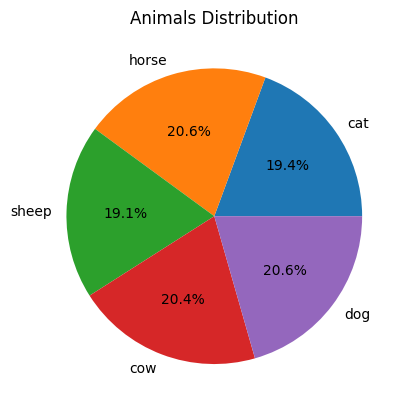

[131, 139, 129, 138, 139]

In [624]:
fig, ax = plt.subplots()
ax.pie(sizes, labels=Animals, autopct='%1.1f%%')
plt.title('Animals Distribution')
plt.show()

sizes

In [625]:
df = pd.concat([X, Y.drop('id', axis=1)], axis=1)
df.head(3)

,id,cat,cow,dog,horse,sheep,bounds_x,bounds_y,bounds_width,bounds_height,...,L_B_paw_y,R_B_paw_v,R_B_paw_x,R_B_paw_y,nothing,stand,sit,lie,go,run
0,265,0,1,0,0,0,37,16,240,170,...,173,1,55,177,0,0,0,0,1,0
1,676,0,0,0,1,0,43,8,208,236,...,232,1,115,233,0,0,0,0,1,0
2,441,0,0,1,0,0,65,0,234,222,...,0,0,0,0,1,0,0,0,0,0


In [626]:
def Type_Action(animal):
    Actions = ['nothing', 'stand', 'sit', 'lie', 'go', 'run']
    Sizes = []
    df_cat = df[df[animal] == 1]

    for i in Actions:
        Sizes.append(df_cat.loc[df[i] == 1].shape[0])
    
    return Sizes

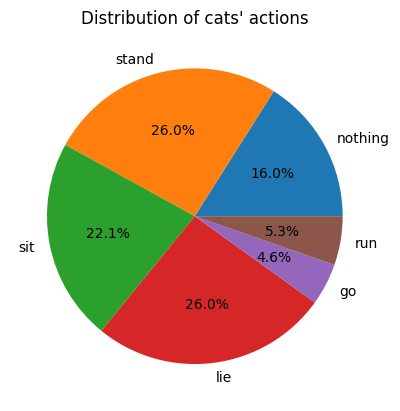

In [627]:
Actions = ['nothing', 'stand', 'sit', 'lie', 'go', 'run']
Sizes = Type_Action('cat')

fig, ax = plt.subplots()
ax.pie(Sizes, labels=Actions, autopct='%1.1f%%')

plt.title('Distribution of cats\' actions')
plt.show()

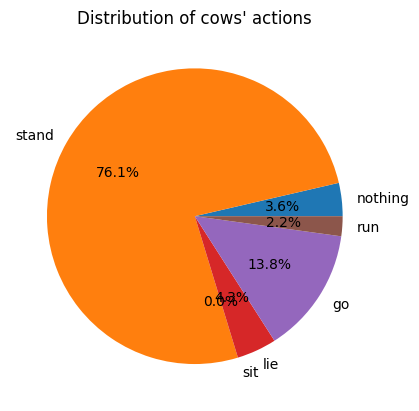

In [628]:
Sizes = Type_Action('cow')

fig, ax = plt.subplots()
ax.pie(Sizes, labels=Actions, autopct='%1.1f%%')

plt.title('Distribution of cows\' actions')
plt.show()

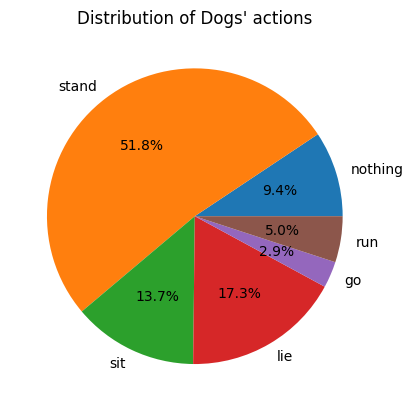

In [629]:
Sizes = Type_Action('dog')

fig, ax = plt.subplots()
ax.pie(Sizes, labels=Actions, autopct='%1.1f%%')

plt.title('Distribution of Dogs\' actions')
plt.show()

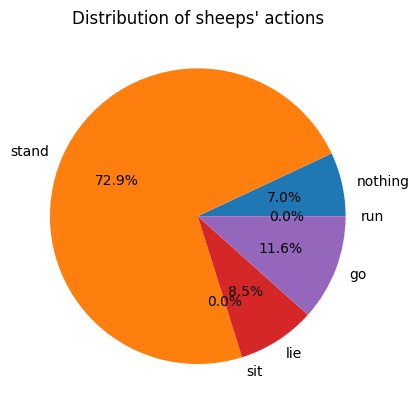

In [630]:
Sizes = Type_Action('sheep')

fig, ax = plt.subplots()
ax.pie(Sizes, labels=Actions, autopct='%1.1f%%')

plt.title('Distribution of sheeps\' actions')
plt.show()

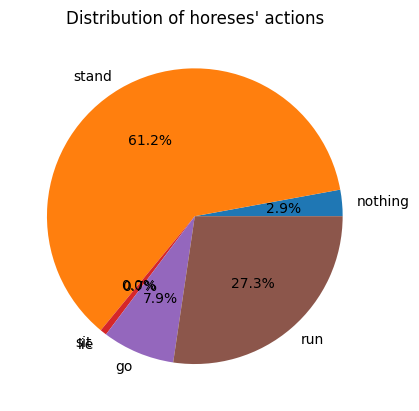

In [631]:
Sizes = Type_Action('horse')

fig, ax = plt.subplots()
ax.pie(Sizes, labels=Actions, autopct='%1.1f%%')

plt.title('Distribution of horeses\' actions')
plt.show()

## Data preparation 

In [632]:
X.head()

,id,cat,cow,dog,horse,sheep,bounds_x,bounds_y,bounds_width,bounds_height,...,L_F_paw_y,R_F_paw_v,R_F_paw_x,R_F_paw_y,L_B_paw_v,L_B_paw_x,L_B_paw_y,R_B_paw_v,R_B_paw_x,R_B_paw_y
0,265,0,1,0,0,0,37,16,240,170,...,167,1,161,168,1,94,173,1,55,177
1,676,0,0,0,1,0,43,8,208,236,...,213,1,193,209,1,77,232,1,115,233
2,441,0,0,1,0,0,65,0,234,222,...,0,0,0,0,0,0,0,0,0,0
3,328,0,1,0,0,0,15,8,272,178,...,171,1,190,172,1,52,176,1,35,178
4,102,1,0,0,0,0,2,1,148,146,...,130,1,68,131,1,3,128,0,0,0


In [633]:
def Animal_Type(row):
    if row['cat'] == 1:
        return 1
    
    if row['cow'] == 1:
        return 2
    
    if row['dog'] == 1:
        return 3
    
    if row['horse'] == 1:
        return 4
    
    if row['sheep'] == 1:
        return 5

In [634]:
X['Animal_Type'] = X.apply(Animal_Type ,axis=1)

In [635]:
X['Animal_Type'].value_counts()

4    139
3    139
2    138
1    131
5    129
Name: Animal_Type, dtype: int64

In [636]:
Y.head()

,id,nothing,stand,sit,lie,go,run
0,265,0,0,0,0,1,0
1,676,0,0,0,0,1,0
2,441,1,0,0,0,0,0
3,328,0,1,0,0,0,0
4,102,0,0,0,1,0,0


In [637]:
def Action_Type(row):
    if row['nothing'] == 1:
        return 0
    if row['stand'] == 1:
        return 1
    if row['sit'] == 1:
        return 2
    if row['lie'] == 1:
        return 3
    if row['go'] == 1:
        return 4
    if row['run'] == 1:
        return 5

In [638]:
Y['Type_Action'] = Y.apply(Action_Type, axis=1)
Y.head()

,id,nothing,stand,sit,lie,go,run,Type_Action
0,265,0,0,0,0,1,0,4
1,676,0,0,0,0,1,0,4
2,441,1,0,0,0,0,0,0
3,328,0,1,0,0,0,0,1
4,102,0,0,0,1,0,0,3


In [639]:
X.drop(['cat', 'cow', 'dog', 'horse', 'sheep', 'id'], axis=1, inplace=True)

In [640]:
X.head()

,bounds_x,bounds_y,bounds_width,bounds_height,L_eye_v,L_eye_x,L_eye_y,R_eye_v,R_eye_x,R_eye_y,...,R_F_paw_v,R_F_paw_x,R_F_paw_y,L_B_paw_v,L_B_paw_x,L_B_paw_y,R_B_paw_v,R_B_paw_x,R_B_paw_y,Animal_Type
0,37,16,240,170,0,0,0,1,270,145,...,1,161,168,1,94,173,1,55,177,2
1,43,8,208,236,0,0,0,1,217,43,...,1,193,209,1,77,232,1,115,233,4
2,65,0,234,222,1,180,67,1,125,63,...,0,0,0,0,0,0,0,0,0,3
3,15,8,272,178,0,0,0,1,251,25,...,1,190,172,1,52,176,1,35,178,2
4,2,1,148,146,1,135,68,1,108,70,...,1,68,131,1,3,128,0,0,0,1


In [641]:
Y.drop(['nothing', 'stand', 'sit', 'lie', 'go', 'run', 'id'], axis=1, inplace=True)

In [642]:
Y.head()

,Type_Action
0,4
1,4
2,0
3,1
4,3


In [643]:
X.shape

(676, 65)

In [644]:
corr_matrix = X.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find features with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.85)]

X.drop(to_drop, axis=1, inplace=True)

In [645]:
X.head()

,bounds_x,bounds_y,bounds_width,bounds_height,L_eye_v,L_eye_x,L_eye_y,R_eye_v,R_eye_x,R_eye_y,...,R_B_knee_x,L_F_paw_v,L_F_paw_x,R_F_paw_v,R_F_paw_x,L_B_paw_v,L_B_paw_x,R_B_paw_v,R_B_paw_x,Animal_Type
0,37,16,240,170,0,0,0,1,270,145,...,49,1,208,1,161,1,94,1,55,2
1,43,8,208,236,0,0,0,1,217,43,...,113,1,167,1,193,1,77,1,115,4
2,65,0,234,222,1,180,67,1,125,63,...,0,0,0,0,0,0,0,0,0,3
3,15,8,272,178,0,0,0,1,251,25,...,40,1,169,1,190,1,52,1,35,2
4,2,1,148,146,1,135,68,1,108,70,...,24,1,129,1,68,1,3,0,0,1


## Decision Tree

In [646]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [647]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

dt = DecisionTreeClassifier()

dt.fit(X_train, y_train)

y_pred = dt.predict(X_test)

print("Accuracy:", dt.score(X_test, y_test))

Accuracy: 0.625


### CV

In [648]:
from sklearn.model_selection import cross_val_score

In [649]:
model = DecisionTreeClassifier()
scores = cross_val_score(model, X, Y, cv=10)

print("Mean accuracy:", scores.mean())

Mean accuracy: 0.5739464442493416


### GridSearchCV

In [650]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [2, 4, 6, 8],
    'min_samples_split': [2, 4, 6, 8],
    'min_samples_leaf': [1, 2, 3, 4]
}

grid = GridSearchCV(model, param_grid, cv=10)

grid.fit(X, Y)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [2, 4, 6, 8],
                         'min_samples_leaf': [1, 2, 3, 4],
                         'min_samples_split': [2, 4, 6, 8]})

In [651]:
print("Best hyperparameters:", grid.best_params_)
print("Best score:", grid.best_score_)

Best hyperparameters: {'max_depth': 6, 'min_samples_leaf': 2, 'min_samples_split': 4}
Best score: 0.6036435469710273


## Forest 

In [652]:
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

rfc = RandomForestClassifier(n_estimators=100, max_depth=3, random_state=42)

rfc.fit(X_train, y_train)

score = rfc.score(X_test, y_test)

print("Accuracy:", score)

Accuracy: 0.625


C:\Users\Никита\AppData\Local\Temp\ipykernel_37152\355882207.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(X_train, y_train)


### XGBoost

In [653]:
from xgboost import XGBClassifier

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

xgb = XGBClassifier(eval_metric='mlogloss')

xgb.fit(X_train, y_train)

score = xgb.score(X_test, y_test)

print("Accuracy:", score)

Accuracy: 0.625


In [654]:
from catboost import CatBoostClassifier

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

model = XGBClassifier(n_estimators=100, max_depth=3, learning_rate=0.1)

model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [655]:
best_estimator = model

## Predict

In [656]:
X_test = pd.read_csv('x_test.csv')

In [657]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 291 entries, 0 to 290
Data columns (total 70 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   id             291 non-null    int64
 1   cat            291 non-null    int64
 2   cow            291 non-null    int64
 3   dog            291 non-null    int64
 4   horse          291 non-null    int64
 5   sheep          291 non-null    int64
 6   bounds_x       291 non-null    int64
 7   bounds_y       291 non-null    int64
 8   bounds_width   291 non-null    int64
 9   bounds_height  291 non-null    int64
 10  L_eye_v        291 non-null    int64
 11  L_eye_x        291 non-null    int64
 12  L_eye_y        291 non-null    int64
 13  R_eye_v        291 non-null    int64
 14  R_eye_x        291 non-null    int64
 15  R_eye_y        291 non-null    int64
 16  L_ear_v        291 non-null    int64
 17  L_ear_x        291 non-null    int64
 18  L_ear_y        291 non-null    int64
 19  R_ear_v 

X_test

In [658]:
X_test['Animal_Type'] = X_test.apply(Animal_Type ,axis=1)

In [659]:
X_test.drop(['cat', 'cow', 'dog', 'horse', 'sheep', 'id'], axis=1, inplace=True)

In [660]:
X_test.drop(to_drop, axis=1, inplace=True)

In [661]:
X_test

,bounds_x,bounds_y,bounds_width,bounds_height,L_eye_v,L_eye_x,L_eye_y,R_eye_v,R_eye_x,R_eye_y,...,R_B_knee_x,L_F_paw_v,L_F_paw_x,R_F_paw_v,R_F_paw_x,L_B_paw_v,L_B_paw_x,R_B_paw_v,R_B_paw_x,Animal_Type
0,59,30,234,156,1,83,57,1,73,58,...,250,1,88,1,141,1,196,1,255,4
1,73,2,170,174,0,0,0,1,221,109,...,82,1,231,1,158,1,142,1,105,1
2,1,8,180,242,1,125,91,1,90,77,...,52,1,141,1,83,0,0,1,52,1
3,19,6,226,160,0,0,0,1,224,42,...,68,0,0,1,205,1,95,1,50,4
4,0,2,297,296,1,201,109,1,79,110,...,0,0,0,0,0,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
286,0,35,547,390,1,475,100,1,394,98,...,10,0,0,0,0,0,0,0,0,5
287,5,3,280,208,0,0,0,1,258,25,...,59,1,177,1,192,1,37,1,78,2
288,45,11,254,202,1,122,68,1,80,69,...,235,0,0,0,0,0,0,0,0,2
289,97,83,420,320,0,0,0,1,472,111,...,144,1,388,1,367,1,113,1,142,5


In [662]:
y_pred = best_estimator.predict(X_test)

In [663]:
y_pred

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 0, 3, 1, 1, 1, 1, 0, 1, 1, 0,
       2, 1, 1, 2, 1, 1, 1, 5, 1, 2, 1, 1, 0, 1, 2, 1, 1, 1, 1, 3, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 4, 5, 1, 1, 1, 2, 3, 1, 1, 1, 4, 1, 1, 1, 0, 0,
       1, 1, 1, 2, 1, 5, 4, 2, 1, 1, 0, 1, 1, 1, 1, 1, 5, 1, 1, 1, 1, 0,
       1, 1, 5, 1, 1, 2, 1, 1, 5, 1, 1, 1, 1, 2, 1, 0, 1, 5, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 4, 1, 1, 4, 1, 3, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 2, 1, 1, 1, 1, 1, 1, 3, 1, 0, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1,
       1, 1, 0, 5, 1, 1, 1, 1, 1, 3, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 5, 1, 1, 1, 1, 2, 1, 1, 1, 0, 1,
       5, 1, 0, 1, 1, 1, 2, 1, 4, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 3,
       1, 1, 1, 1, 2], dtype=int64)

In [664]:
X_test

,bounds_x,bounds_y,bounds_width,bounds_height,L_eye_v,L_eye_x,L_eye_y,R_eye_v,R_eye_x,R_eye_y,...,R_B_knee_x,L_F_paw_v,L_F_paw_x,R_F_paw_v,R_F_paw_x,L_B_paw_v,L_B_paw_x,R_B_paw_v,R_B_paw_x,Animal_Type
0,59,30,234,156,1,83,57,1,73,58,...,250,1,88,1,141,1,196,1,255,4
1,73,2,170,174,0,0,0,1,221,109,...,82,1,231,1,158,1,142,1,105,1
2,1,8,180,242,1,125,91,1,90,77,...,52,1,141,1,83,0,0,1,52,1
3,19,6,226,160,0,0,0,1,224,42,...,68,0,0,1,205,1,95,1,50,4
4,0,2,297,296,1,201,109,1,79,110,...,0,0,0,0,0,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
286,0,35,547,390,1,475,100,1,394,98,...,10,0,0,0,0,0,0,0,0,5
287,5,3,280,208,0,0,0,1,258,25,...,59,1,177,1,192,1,37,1,78,2
288,45,11,254,202,1,122,68,1,80,69,...,235,0,0,0,0,0,0,0,0,2
289,97,83,420,320,0,0,0,1,472,111,...,144,1,388,1,367,1,113,1,142,5


In [665]:
ans = pd.read_csv('x_test.csv')
ans = ans[['id']]
ans['label'] = y_pred

In [666]:
ans

,id,label
0,582,1
1,42,1
2,148,1
3,737,1
4,213,0
...,...,...
286,902,1
287,284,1
288,276,1
289,889,1


## Concate Test and Train Data

In [667]:
X.shape

(676, 51)

In [668]:
X_test.shape

(291, 51)

In [669]:
test = X_test

In [670]:
new_x = pd.concat([X, X_test], axis=0)
new_x

,bounds_x,bounds_y,bounds_width,bounds_height,L_eye_v,L_eye_x,L_eye_y,R_eye_v,R_eye_x,R_eye_y,...,R_B_knee_x,L_F_paw_v,L_F_paw_x,R_F_paw_v,R_F_paw_x,L_B_paw_v,L_B_paw_x,R_B_paw_v,R_B_paw_x,Animal_Type
0,37,16,240,170,0,0,0,1,270,145,...,49,1,208,1,161,1,94,1,55,2
1,43,8,208,236,0,0,0,1,217,43,...,113,1,167,1,193,1,77,1,115,4
2,65,0,234,222,1,180,67,1,125,63,...,0,0,0,0,0,0,0,0,0,3
3,15,8,272,178,0,0,0,1,251,25,...,40,1,169,1,190,1,52,1,35,2
4,2,1,148,146,1,135,68,1,108,70,...,24,1,129,1,68,1,3,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
286,0,35,547,390,1,475,100,1,394,98,...,10,0,0,0,0,0,0,0,0,5
287,5,3,280,208,0,0,0,1,258,25,...,59,1,177,1,192,1,37,1,78,2
288,45,11,254,202,1,122,68,1,80,69,...,235,0,0,0,0,0,0,0,0,2
289,97,83,420,320,0,0,0,1,472,111,...,144,1,388,1,367,1,113,1,142,5


In [671]:
Y

,Type_Action
0,4
1,4
2,0
3,1
4,3
...,...
671,1
672,1
673,1
674,3


In [672]:
Y_test = pd.DataFrame()
Y_test['Type_Action'] = ans[['label']]

In [673]:
Y_test

,Type_Action
0,1
1,1
2,1
3,1
4,0
...,...
286,1
287,1
288,1
289,1


In [674]:
Y_new = pd.concat([Y, Y_test], axis=0)
Y_new

,Type_Action
0,4
1,4
2,0
3,1
4,3
...,...
286,1
287,1
288,1
289,1


## Final Predict XGBoost

In [675]:
X_train, X_test, y_train, y_test = train_test_split(new_x, Y_new, test_size=0.2)

xgb = XGBClassifier()

xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [676]:
y_pred = xgb.predict(test)

In [677]:
X_test

,bounds_x,bounds_y,bounds_width,bounds_height,L_eye_v,L_eye_x,L_eye_y,R_eye_v,R_eye_x,R_eye_y,...,R_B_knee_x,L_F_paw_v,L_F_paw_x,R_F_paw_v,R_F_paw_x,L_B_paw_v,L_B_paw_x,R_B_paw_v,R_B_paw_x,Animal_Type
187,37,8,260,152,1,144,83,1,99,85,...,0,1,153,1,93,1,210,0,0,1
126,11,3,280,148,0,0,0,1,270,27,...,31,0,0,0,0,0,0,0,0,2
613,21,24,276,198,1,275,60,1,242,60,...,48,1,192,1,213,1,88,1,58,2
141,5,3,286,190,1,270,57,1,245,56,...,33,0,0,1,177,0,0,0,0,2
163,3,2,214,194,1,180,82,1,129,84,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,63,8,196,282,1,173,95,1,126,100,...,0,1,224,1,190,0,0,0,0,1
588,7,6,284,204,1,37,46,0,0,0,...,219,1,95,1,91,1,277,1,194,3
389,273,0,292,428,1,417,79,1,327,78,...,0,1,453,1,319,1,515,1,369,5
147,47,8,252,178,1,156,63,1,93,65,...,0,0,0,0,0,0,0,0,0,2


In [678]:
ans['label'] = y_pred

In [680]:
ans.to_csv('test111.csv', index=False)